# Analytic Solution to the Mohr-Coulomb Oedometer Test 
### This is from Appendix A in Choi et al. (2013) doi:10.1002/jgrb.50148
In the setting depicted by the schematic diagram, the components of the strain increments are given by

$$
\Delta \epsilon_{xx} = \frac{v_{x} \Delta t}{L}
$$

where, $L$ is the length of the side of the square domain, $\Delta t$ is time increment.

$$
\Delta \epsilon_{yy} = \Delta \epsilon_{zz} =0
$$

The corresponding stress increments in the elastic regime and stresses at any time t before yielding are given as

$$
\Delta \sigma^{el}_{xx} = \left( \lambda + 2 \mu \right) \Delta \epsilon_{xx}
$$

$$
\Delta \sigma^{el}_{yy} = \Delta \sigma^{el}_{zz} = \lambda \Delta \epsilon_{xx}
$$

while at the yielding, the stresses deﬁned above make the following two yield functions simultaneously zero:

$$
f_{s,1} \left(\sigma_{xx}, \sigma_{yy} \right) = \sigma_{xx} - \frac{1+sin \phi}{1-sin \phi} \sigma_{yy} + 2C \sqrt \frac{1+sin \phi}{1-sin \phi} \\  \ \ = \sigma_{xx} - N_{\phi} \sigma_{yy} + 2C \sqrt N_{\phi}
$$

$$
f_{s,2} \left(\sigma_{xx}, \sigma_{zz} \right) = \sigma_{xx} - N_{\phi} \sigma_{zz} + 2C \sqrt N_{\phi}
$$

Because of the inherent symmetry (i.e., $\sigma_{yy} = \sigma_{zz}$ ), from $f_{s,1}$ or $f_{s,2}$ = 0, for instance, we get the following expression for the time when yielding starts

$$
t_{yield} = \frac{CL \sqrt N_{\phi}}{\left( \left( \lambda + 2 \mu \right) - \lambda N_{\phi} \right) |v_{x}|}
$$

By the same token, plastic ﬂows need to be computed from two yield potentials,

$$
g_{s,1} \left(\sigma_{xx}, \sigma_{yy} \right) = \sigma_{xx} - \frac{1+sin \psi}{1-sin \psi} \sigma_{yy} = \sigma_{xx} - N_{\psi} \sigma_{yy}
$$

$$
g_{s,2} \left(\sigma_{xx}, \sigma_{zz} \right) = \sigma_{xx} - N_{\psi} \sigma_{zz}
$$

Then, plastic strain increments are given as

$$
\Delta \epsilon^{pl}_{xx} = \beta_1 \frac{\partial g_{s,1}}{\partial \sigma_{xx}} + \beta_2 \frac{\partial g_{s,2}}{\partial \sigma_{xx}} = \beta_1 + \beta_2 = 2 \beta
$$

$$
\Delta \epsilon^{pl}_{yy} = \beta_1 \frac{\partial g_{s,1}}{\partial \sigma_{yy}}  = -\beta_1 N_{\psi} = -\beta N_{\psi}
$$

where the inherent symmetry is utilized again to identify $\beta_1$ with $\beta_2$ and denote them as $\beta$ . Collecting the previous results, we conclude that the stress increments after yielding are the following:

$$
\Delta \sigma_{xx} = \left( \lambda + 2 \mu \right) \Delta \epsilon^{el}_{xx} + \lambda \left( \Delta \epsilon^{el}_{yy} + \Delta \epsilon^{el}_{zz} \right)
$$

$$
\Delta \sigma_{yy} = \left( \lambda + 2 \mu \right) \Delta \epsilon^{el}_{yy} + \lambda \left( \Delta \epsilon^{el}_{xx} + \Delta \epsilon^{el}_{zz} \right)
$$

$$
\Delta \sigma_{zz} = \left( \lambda + 2 \mu \right) \Delta \epsilon^{el}_{zz} + \lambda \left( \Delta \epsilon^{el}_{xx} + \Delta \epsilon^{el}_{yy} \right)
$$

By substituting the expressions for the elastic strain increments into the above equations,

$$
\Delta \epsilon^{el}_{xx} = \Delta \epsilon_{xx} - \Delta \epsilon^{pl}_{xx} = \frac{v_{x} \Delta t}{L} - 2 \beta
$$

$$
\Delta \epsilon^{el}_{yy} = \Delta \epsilon_{yy} - \Delta \epsilon^{pl}_{yy} = \beta N_{\psi}
$$

$$
\Delta \epsilon^{el}_{zz} = \Delta \epsilon_{zz} - \Delta \epsilon^{pl}_{zz} = \beta N_{\psi}
$$

By substituting the expressions for the elastic strain increments into the above equations,

$$
\Delta \sigma_{xx} = \left( \lambda + 2 \mu \right) \frac{v_{x} \Delta t}{L} - 2 \beta + 2 \lambda \beta N_{\psi}
$$

$$
\Delta \sigma_{yy} = \Delta \sigma_{zz} = \left( \lambda + 2 \mu \right) \beta N_{\psi} + \lambda \left(  \frac{v_{x} \Delta t}{L} + \left( N_{\psi} - 2 \right) \beta  \right)
$$

Now, we solve the following incremental consistency condition for $\beta$ :

$$
\Delta f_{s,1} \left(\Delta \sigma_{xx}, \Delta \sigma_{yy} \right) = \Delta \sigma_{xx} - N_{\phi} \Delta \sigma_{yy} = 0
$$

Thus, the closed form expression for $\beta$ is given as

$$
\beta = \frac{\left( \lambda + 2 \mu \right) - \lambda N_{\phi} }{2 \left( \lambda + \mu \right) N_{\phi} N_{\psi} + 2 \left( \lambda + 2 \mu \right) - 2 \left( N_{\phi} + N_{\psi} \right)\lambda} \frac{v_{x} \Delta t}{L}
$$

In [1]:
import numpy
import matplotlib.pyplot as plt
from math import pi,sin, sqrt

In [2]:
plt.rcParams['font.serif'] = ['Helvetica'] + plt.rcParams['font.serif']
plt.rcParams['lines.linewidth'] = 4
font1 = {'size': 24, 'color':  'black'}

In [3]:
def analytical(psi):
    K = 200e6
    mu = 200e6
    lame1 = K - 2.0*mu/3.0 
    coh = 1e6
    phi = 10.0*pi/180
    psi = psi*pi/180
    ten = coh/numpy.tan(phi)
    rho = 1.0
    vx = 1e-5
    e1 = K+4.0*mu/3.0
    e2 = K-2.0*mu/3.0   
    sf = sin(phi)
    sp = sin(psi)
    nf = (1.0+sf)/(1.0-sf)
    np = (1.0+sp)/(1.0-sp)
    rl = (e1-e2*nf)/((e1+e2)*nf*np-2.0*e2*(nf+np)+2.0*e1)
    step1 = 2.0*coh*sqrt(nf)/((e1-e2*nf)*vx) # when yielding occurs
    displacement = vx * numpy.array(range(2001), dtype=float)
    Sxx = numpy.zeros(2001, dtype=float)
    Sxx_y = numpy.zeros(2001, dtype=float)
    for i in range(1, 2001):
        de = vx / (1 - displacement[i])              
        Sxx[i] = Sxx[i-1] + (lame1 + 2*mu)*de
        if i < step1:
            Sxx_y[i] = Sxx_y[i-1] + e1*de
        else:
            Sxx_y[i] = Sxx_y[i-1] + de*(e1+2.0*rl*(e2*np-e1))
    
    return displacement, Sxx, Sxx_y

In [4]:
psi = 0.0
displacement, Sxx, Sxx_y_phi0 = analytical(psi)
psi = 10.0
displacement, Sxx, Sxx_y_phi10 = analytical(psi)

In [5]:
laghos_data1 = numpy.loadtxt("solutions_elastic.txt")
laghos_data2 = numpy.loadtxt("solutions_plastic_0.txt")
laghos_data3 = numpy.loadtxt("solutions_plastic_10.txt")

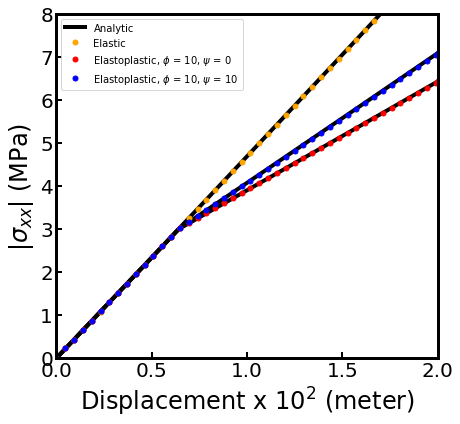

In [6]:
f1 = plt.figure(figsize=(6.5, 6))
ax1 = plt.subplot(1, 1, 1)
ax1.tick_params(direction='in', length=6, width=2, colors='k')
plt.setp(ax1.spines.values(), linewidth=3)


# Analytic solution
plt.plot(displacement*100, Sxx*1e-6, linestyle='-', c='k', alpha=1.00)
plt.plot(displacement*100, Sxx_y_phi0*1e-6, linestyle='-', c='k', alpha=1.00, label='Analytic')
plt.plot(displacement*100, Sxx_y_phi10*1e-6, linestyle='-', c='k', alpha=1.00)

# Numerical solution
plt.plot(laghos_data1[:,0], laghos_data1[:,1], 'o', color='orange', markersize=5, label='Elastic')
plt.plot(laghos_data2[:,0], laghos_data2[:,1], 'o', color='red', markersize=5, label='Elastoplastic, $\phi$ = 10, $\psi$ = 0')
plt.plot(laghos_data3[:,0], laghos_data3[:,1], 'o', color='blue', markersize=5, label='Elastoplastic, $\phi$ = 10, $\psi$ = 10')

plt.xlabel("Displacement x $10^{2}$ (meter)", fontdict=font1)
plt.ylabel("|$\sigma_{xx}$| (MPa)", fontdict=font1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.axis((0, 2, 0, 8))
plt.xticks(numpy.arange(min(displacement*1e2), max(displacement*1e2)+0.5, 0.5))
plt.tight_layout()
plt.legend()
plt.show()

In [7]:
def compute_relative_error(y, analytic, laghos_y, laghos):
    return numpy.linalg.norm(analytic[0:-1] - numpy.interp(y[0:-1], laghos_y, laghos))/numpy.linalg.norm(analytic[0:-1])

error_elastic = compute_relative_error( displacement*100, Sxx*1e-6, laghos_data1[:,0], laghos_data1[:,1] )
print("Rel. error for elastic: {0:.3e}".format(error_elastic))

error_plastic1 = compute_relative_error( displacement*100, Sxx_y_phi0*1e-6, laghos_data2[:,0], laghos_data2[:,1] )
print("Rel. error for error_plastic1: {0:.3e}".format(error_plastic1))

error_plastic2 = compute_relative_error( displacement*100, Sxx_y_phi10*1e-6, laghos_data3[:,0], laghos_data3[:,1] )
print("Rel. error for error_plastic2: {0:.3e}".format(error_plastic2))

Rel. error for elastic: 4.946e-04
Rel. error for error_plastic1: 7.981e-04
Rel. error for error_plastic2: 7.089e-04
